## 2024 NCAA Hockey Plotting Book

## Begin Code - Setup

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerTuple
from matplotlib.legend_handler import HandlerBase
from scipy.ndimage import rotate
import os
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3  # Assuming SQL connection for database operations

### Global Settings
set_linewidth = 1
all_color='grey'



import os
## File Paths
## DATA
data_folder = os.path.join(os.getcwd(), '..', '..', 'data')
ncaa_folder = '../'

## IMAGES 
# logo_folder = '../../images/logos/'  # Defined Below
background_folder = '../../images/backgrounds/'

# PAIRWISE / REGIONAL ASSIGNMENTS
pairwise_path = '../data/final_pairwise_2023.csv'


## ROSTER
# All Time Combined Roster - need to filter for 'Season'
all_time_roster_file = os.path.join(data_folder, 'rosters','master_roster.csv')

## BOX SCORE AND ADVANCED METRICS DB
db_file = os.path.join(data_folder, 'db', 'CHN_YTD_Stats.db') # Current Year to Date Stats

# Check setup and filepaths
# all_time_roster_file, db_file

## Load Data
# Load Roster
main_roster_df = pd.read_csv(all_time_roster_file)

# Load DB
conn = sqlite3.connect(db_file)
# Create a cursor object
cur = conn.cursor()
# Print List of Tables to check connection
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())


### DEFINE TEMP FOLDER - MAKE SURE IT IS NOT OVERWRITTEN BELOW
TEMP_FOLDER = '../../NCAA/TEMP/'


[('goalie_stats',), ('line_chart',), ('advanced_metrics',), ('game_details',), ('player_stats',), ('linescore',), ('penalty_summary',), ('scoring_summary',), ('player_stats_ytd',), ('master_roster',)]


C:\Users\jbanc\AppData\Local\Temp\ipykernel_15500\783439866.py:56: DtypeWarning: Columns (19,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  main_roster_df = pd.read_csv(all_time_roster_file)


In [2]:
## CHECK PATHS TO MAKE SURE THEY ARE CORRECT
#LOAD PAIRWISE TABLE INTO DF
pairwise_df = pd.read_csv(pairwise_path)
# pairwise_df.head()

# Check Roster Data
# Filter to 2023 Season
roster_df = main_roster_df[main_roster_df['Season'] == 2023]
# roster_df.head()

# Print list of tables in the DB
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())


[('goalie_stats',), ('line_chart',), ('advanced_metrics',), ('game_details',), ('player_stats',), ('linescore',), ('penalty_summary',), ('scoring_summary',), ('player_stats_ytd',), ('master_roster',)]


## Team Color and Logo Info & Library

In [3]:

# Team Color Information
            # path to table with hex codes
team_color_path = os.path.join(ncaa_folder, 'data', 'team_color_book.csv')
team_colors = pd.read_csv(team_color_path)
highlight_colors = team_colors

# Logo Folder path
logo_folder = '../../images/logos/'

# Dictionary to map team names to their logo filenames
logo_mapping = {
    
    'Michigan State': 'msu.png',
    'Michigan Tech': 'mtu.png',
    'Boston College': 'bc_.png',
    'Michigan': 'mic.png',
    'Minnesota': 'min.png',
    "Wisconsin": "wis.png",
    'RIT': 'rit.png',
    'Quinnipiac': 'qui.png',
    'Cornell': 'cor.png',
    'Boston University': 'bu_.png',
    'Maine': 'mne.png',
    'Massachusetts': 'uma.png',
    'Denver': 'den.png',
    'North Dakota': 'ndk.png',
    'Omaha': 'uno.png',
    'Western Michigan': 'wmu.png'    
}

pairwise_df.head()



## Merge PW Data with Color Data. Create dictionary of teams in each regional
# Merge pairwise with team colors
team_info_df = pairwise_df.merge(team_colors, left_on='Team', right_on='Team')
# team_info_df.head(20)

## Group by Regional and create a dictionary of teams in each region
region_dict = {}

for region in team_info_df['Regional'].unique():
    region_dict[region] = team_info_df[team_info_df['Regional'] == region]['Team'].to_list()

region_dict





{'Providence': ['Boston College', 'Wisconsin', 'Quinnipiac', 'Michigan Tech'],
 'Sioux Falls': ['Boston University', 'Minnesota', 'Omaha', 'RIT'],
 'Springfield': ['Denver', 'Maine', 'Cornell', 'Massachusetts'],
 'Maryland H': ['Michigan State',
  'North Dakota',
  'Michigan',
  'Western Michigan']}

## Figure Size and Font Settings

In [4]:

## Make Sure Font Library is updated
import matplotlib.font_manager
# matplotlib.font_manager._rebuild()



# figure_size = square_fig

#### INSTAGRAM SIZE - Portrait
dpi = 600
width, height = 1080, 1350  # in pixels
# figure_size = (width / dpi, height / dpi)  # in inches

## FONT PARAMETERS
font_title_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 16}
font_label_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 14}
font_tick_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 8}
font_label_large_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 16}
font_tick_large_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 12}

font_tag_parm = {'family': 'Exo 2', 'color': 'black', 'weight': 'bold', 'size': 10}
font_tag_parm_2 = {'family': 'Exo 2', 'color': 'black', 'weight': 'bold', 'size': 12}

## Helper Functions & Logo Mapping

In [5]:
# Calculate average age for each team in the pairwise rankings
roster_df['DOB'] = pd.to_datetime(roster_df['DOB'])
# Calulate each players age in days
roster_df['Age'] = (pd.Timestamp.now() - roster_df['DOB']).dt.days

# Group by Team and calculate the average age for each
team_age_df = roster_df.groupby('Team')['Age'].mean().reset_index()
# Conver to years
team_age_df['Age'] = team_age_df['Age'] / 365

# roster_df.head()
# team_age_df.head()



C:\Users\jbanc\AppData\Local\Temp\ipykernel_15500\2302228172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roster_df['DOB'] = pd.to_datetime(roster_df['DOB'])
C:\Users\jbanc\AppData\Local\Temp\ipykernel_15500\2302228172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roster_df['Age'] = (pd.Timestamp.now() - roster_df['DOB']).dt.days


In [6]:
## NEW SUB FUNCTION 3/24/24
def add_logos_to_plot(data_df, x_col, y_col, logo_mapping, logo_folder, ax, teams_in_region):
    # Plot logos for specific teams
    for team in teams_in_region:
        team_data = data_df[data_df['Team'] == team]
        if not team_data.empty:
            x = team_data[x_col].values[0]
            y = team_data[y_col].values[0]
            logo_path = os.path.join(logo_folder, logo_mapping.get(team, ""))
            if logo_path:
                try:
                    logo_img = plt.imread(logo_path)
                    imagebox = OffsetImage(logo_img, zoom=0.15)  # Adjust zoom as needed
                    ab = AnnotationBbox(imagebox, (x, y), frameon=False, xybox=(10, 20), boxcoords="offset points", pad=0)
                    ax.add_artist(ab)  # Apply the ax here as the artist is being added to ax
                except Exception as e:
                    print(f"Error adding logo for {team}: {e}")



## Check Logo Transparency - Convert to RGBA if needed

In [7]:
import os
from PIL import Image

def convert_to_rgba(logo_mapping, logo_folder):
    for team, filename in logo_mapping.items():
        file_path = os.path.join(logo_folder, filename)
        try:
            with Image.open(file_path) as img:
                # Convert the image to RGBA if not already in that mode
                if img.mode != 'RGBA':
                    rgba_image = img.convert('RGBA')
                    # Save the converted image back to the folder
                    rgba_image.save(file_path)
                    print(f"Converted {filename} to RGBA.")
                else:
                    print(f"{filename} is already RGBA.")
        except FileNotFoundError:
            print(f"File {filename} not found in {logo_folder}.")
        except Exception as e:
            print(f"An error occurred with {filename}: {e}")

# Run the conversion function
convert_to_rgba(logo_mapping, logo_folder)

# Function to check if images have an alpha channel
def check_image_channels(logo_mapping, logo_folder):
    results = {}
    for team, filename in logo_mapping.items():
        try:
            file_path = os.path.join(logo_folder, filename)
            with Image.open(file_path) as img:
                # Check if the image has an alpha channel
                results[team] = "Alpha channel present" if img.mode == 'RGBA' else "No alpha channel"
        except FileNotFoundError:
            results[team] = "File not found"
        except Exception as e:
            results[team] = str(e)
    return results

# Run the check and print the results
alpha_check_results = check_image_channels(logo_mapping, logo_folder)
alpha_check_results



msu.png is already RGBA.
mtu.png is already RGBA.
bc_.png is already RGBA.
mic.png is already RGBA.
min.png is already RGBA.
wis.png is already RGBA.
rit.png is already RGBA.
qui.png is already RGBA.
cor.png is already RGBA.
bu_.png is already RGBA.
mne.png is already RGBA.
uma.png is already RGBA.
den.png is already RGBA.
ndk.png is already RGBA.
uno.png is already RGBA.
wmu.png is already RGBA.


{'Michigan State': 'Alpha channel present',
 'Michigan Tech': 'Alpha channel present',
 'Boston College': 'Alpha channel present',
 'Michigan': 'Alpha channel present',
 'Minnesota': 'Alpha channel present',
 'Wisconsin': 'Alpha channel present',
 'RIT': 'Alpha channel present',
 'Quinnipiac': 'Alpha channel present',
 'Cornell': 'Alpha channel present',
 'Boston University': 'Alpha channel present',
 'Maine': 'Alpha channel present',
 'Massachusetts': 'Alpha channel present',
 'Denver': 'Alpha channel present',
 'North Dakota': 'Alpha channel present',
 'Omaha': 'Alpha channel present',
 'Western Michigan': 'Alpha channel present'}

## Team Breakdown By Class Plot

findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.


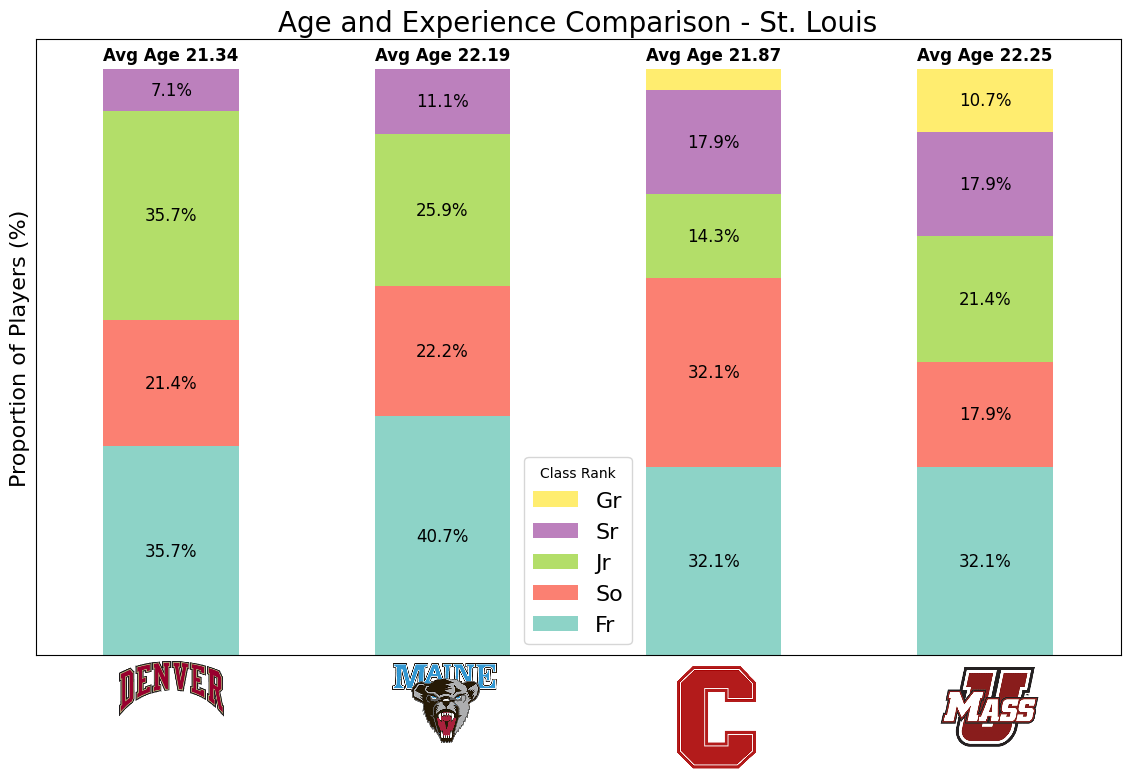

In [8]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

###### SETTINGS ######
zoom_factor = 0.25
y_offset = 1.1
age_offset = -.125
age_fontsize = 12


def plot_team_ages_and_experience_with_logos(roster_df, team_names, region_name, logo_mapping, logo_folder, figure_size=(14, 8)):
    """
    Plots a stacked bar chart comparing the age and experience of hockey teams, using team logos for x-axis labels.
    
    Parameters:
    - roster_df: DataFrame containing the team rosters.
    - team_names: List of the team names to be included in the plot.
    - region_name: The name of the region for the title of the plot.
    - logo_mapping: Dictionary mapping team names to logo image filenames.
    - logo_folder: Path to the folder containing the logo images.
    - figure_size: Tuple indicating the figure size.
    """
    
    # Process data as before
    filtered_df = roster_df[roster_df['Team'].isin(team_names)]
    correct_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']
    # Reverse the order of the ranks
    # correct_order.reverse()
    class_counts = filtered_df.groupby(['Team', 'Yr'])['Player'].count().unstack().fillna(0)
    class_proportions = class_counts.div(class_counts.sum(axis=1), axis=0)
    available_ranks = [rank for rank in correct_order if rank in class_proportions.columns]
    class_proportions_corrected = class_proportions[available_ranks]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figure_size)
    bars = class_proportions_corrected.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')
    ax.set_title(f'Age and Experience Comparison - {region_name}')
    ax.set_xlabel('Teams')
    ax.set_ylabel('Proportion of Players (%)')


    ax.legend(title='Class Rank', fontsize=16).set_draggable(True)
    # Reverse the order in the legend to match the bars
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), title='Class Rank', fontsize=16).set_draggable(True)

    # Iterate through the patches (bars) to add the text annotations
    for bar in bars.patches:
        # Get the bar's height, width, and position
        height = bar.get_height()
        width = bar.get_width()
        x, y = bar.get_xy()
        # The label is set to be at 50% of the height of the bar, you can adjust it if necessary
        label_text = f'{height:.1%}'
        label_x = x + width / 2
        label_y = y + height / 2
        
        # Only add text if the bar is tall enough to fit the text
        if height > 0.05:  # 5% threshold, can be adjusted
            ax.text(label_x, label_y, label_text, ha='center', va='center', color='black', fontsize=12)


    
    ######### AXIS AND LABEL SETTINGS #########
    # Adjust the Title Properties
    ax.title.set_fontsize(20)
    # Set the x-axis Title to blank
    ax.set_xlabel('')
    # Set y-axis label to blank
    # ax.set_ylabel('')
    ax.set_ylabel('Proportion of Players (%)', fontdict=font_label_large_param)
    # Remove x-tick labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add logos as x-tick labels
    for i, team in enumerate(team_names):
        if team in logo_mapping:
            file_path = os.path.join(logo_folder, logo_mapping[team])
            img = plt.imread(file_path)
            imagebox = OffsetImage(img, zoom=zoom_factor)
            ab = AnnotationBbox(imagebox, (i, 0), xycoords=('data', 'axes fraction'),
                                boxcoords="offset points", box_alignment=(0.5, y_offset), pad=0, frameon=False)
            ax.add_artist(ab)
    
        # Retrieve the average age for the team
        team_age = team_age_df.loc[team_age_df['Team'] == team, 'Age'].values[0]
        
        team_age_text = f'Avg Age {team_age:.2f}'  # Add "Avg Age" prefix and format the age with 2 decimal places

        # Define the x and y position for the team age text
        age_text_x = i
        age_text_y = y_offset + age_offset  # You can adjust age_offset to move the text up or down

        # Add the age text to the plot
        ax.text(age_text_x, age_text_y, team_age_text, ha='center', va='center', fontsize=age_fontsize, weight='bold', 
                transform=ax.get_xaxis_transform())

    plt.show()

# Example usage
plot_team_ages_and_experience_with_logos(roster_df, region_dict['Springfield'], 'St. Louis', logo_mapping, logo_folder)


# Region by Region Scatter Plots

## Shots

### Code

In [9]:
def create_avg_shots_plot(region_name, conn, logo_mapping, logo_folder, region_dict):
    figure_size = (10, 10)  # Optimal size for platforms like Instagram

    avg_shots_query = """
    WITH UniqueGames AS (
        SELECT DISTINCT * FROM linescore
    )
    SELECT
        a.Team,
        AVG(a.shotsT) AS Avg_Shots_Taken,
        AVG(b.shotsT) AS Avg_Shots_Allowed
    FROM UniqueGames AS a
    JOIN UniqueGames AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
    GROUP BY a.Team;

    """
    
    # Execute the query to fetch data for all teams
    avg_shots_df = pd.read_sql(avg_shots_query, conn)

    # Calculate average and standard deviation for "Shots Taken" and "Shots Allowed"
    avg_shots_taken = avg_shots_df['Avg_Shots_Taken'].mean()
    std_shots_taken = avg_shots_df['Avg_Shots_Taken'].std()
    avg_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].mean()
    std_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].std()

    # Create the scatter plot for all teams
    fig, ax = plt.subplots(figsize=figure_size)
    sns.scatterplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', color='darkgrey', ax=ax)

    # Add trend line
    sns.regplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', scatter=False, color='blue')

    # Adjust x-axis to add padding on the left
    xmin, xmax = ax.get_xlim()
    new_xmin = xmin  # Subtract 2 from the x-minimum for additional padding
    ax.set_xlim(new_xmin, xmax)

    # Get and Adjust y-limits if needed
    ymin, ymax = ax.get_ylim()

    # Now, plot the average lines and standard deviation markers after setting the axis limits
    plt.axhline(y=avg_shots_taken, color='red', linestyle='--', linewidth=0.8)
    plt.axvline(x=avg_shots_allowed, color='red', linestyle='--', linewidth=0.8)
    plt.errorbar(avg_shots_allowed, avg_shots_taken, xerr=std_shots_allowed, 
                 yerr=std_shots_taken, color='purple', fmt='o')

    # Set the background image
    # Ensure that the extent of the background image is also adjusted to the new xmin
    plt.imshow(bg_img, aspect='auto', extent=[new_xmin, xmax, ymin, ymax], zorder=0, alpha=alpha_value)

    # Overlay logos for specific teams in the region
    teams_in_region = region_dict[region_name]
    add_logos_to_plot(avg_shots_df, 'Avg_Shots_Allowed', 'Avg_Shots_Taken', logo_mapping, logo_folder, ax, teams_in_region)

    # Create table data
    table_data = [['Team', 'Avg Shots', 'Avg Allowed']]
    for team in teams_in_region:
        team_data = avg_shots_df[avg_shots_df['Team'] == team]
        if not team_data.empty:
            table_data.append([
                team, 
                f"{team_data['Avg_Shots_Taken'].values[0]:.2f}",
                f"{team_data['Avg_Shots_Allowed'].values[0]:.2f}"
            ])

    # Define the column widths, making the first column wider
    col_widths = [0.25, 0.225, 0.225]  # Adjust the values as needed

    # Add a table at the top right of the plot & Set Parameters
    table = plt.table(cellText=table_data, loc='best', 
                      colWidths=col_widths,
                      cellLoc='center', 
                      bbox=[0.45, 0, 0.5, 0.3]
                      )
    
    # Customize the table properties
    table.auto_set_font_size(False)
    table.set_fontsize(12)  # Set the fontsize
    table.scale(1, 1.5)  # Scale the table for width and height

    # Set individual cell properties
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            # Header row
            cell.set_text_props(weight='bold')  # Make the header bold
            cell.set_facecolor('lightgrey')  # Header background color
        else:
            # All other rows
            cell.set_facecolor('none')  # Make cells transparent
            # cell.set_text_props(weight='bold')  # Optionally make text bold
        cell.set_edgecolor('w')  # Set the border color to white

    # Add title and axis labels
    plt.title('Shots Per Game: ' + region_name, fontdict=font_title_param)
    plt.xlabel('Average Shots Allowed')
    plt.ylabel('Average Shots Taken')

    plt.show()





### Output

findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.


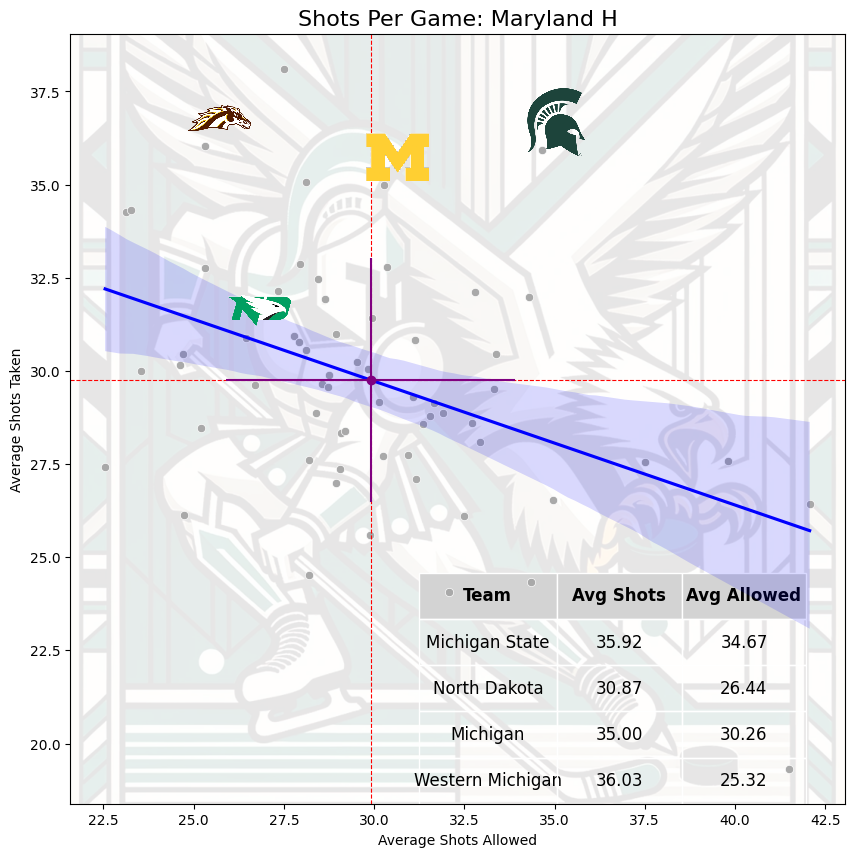

In [10]:

region_name = 'Maryland H'


# #### Set Background Image
path_to_bg_image =  'bc1.png' #
alpha_value = 0.1 # Set the transparency of the background image
## Load the background image
bg_img = mpimg.imread(background_folder + path_to_bg_image)

# Call the function with the specified parameters
create_avg_shots_plot(region_name, conn, logo_mapping, logo_folder, region_dict)

## Goals

### Code

In [11]:
def create_avg_goals_plot(region_name, conn, logo_mapping, logo_folder, region_dict):
    figure_size = (10, 10)  # Optimal size for platforms like Instagram
    
    ## New Query to calvulate average goals using the player stats ytd table
    ## Sum Goals by team count the instances of Unique Game IDin game details for each team
    avg_goals_query = """
    WITH UniqueGames AS (
        SELECT DISTINCT * FROM linescore
    )

    SELECT 
        UG1.Team, 
        SUM(UG1.goalsT) AS Total_Goals_Scored, 
        SUM(UG2.goalsT) AS Total_Goals_Allowed,
        COUNT(DISTINCT UG1.Game_ID) AS Games_Played
    FROM 
        UniqueGames UG1
    JOIN 
        UniqueGames UG2 ON UG1.Game_ID = UG2.Game_ID AND UG1.Team != UG2.Team
    GROUP BY 
        UG1.Team;
    """



    # Execute the query and store the results in a DataFrame
    avg_goals_df = pd.read_sql(avg_goals_query, conn)
    # Calculate averages of goals scored and allowed
    avg_goals_df['Avg_Goals_Scored'] = avg_goals_df['Total_Goals_Scored'] / avg_goals_df['Games_Played']
    avg_goals_df['Avg_Goals_Allowed'] = avg_goals_df['Total_Goals_Allowed'] / avg_goals_df['Games_Played']


    # Calculate average and standard deviation for "Goals Scored" and "Goals Allowed"
    avg_goals_scored = avg_goals_df['Avg_Goals_Scored'].mean()
    std_goals_scored = avg_goals_df['Avg_Goals_Scored'].std()
    avg_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].mean()
    std_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].std()
    
    # # Create the scatter plot for all teams
    fig, ax = plt.subplots(figsize=figure_size)
    sns.scatterplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', color='darkgrey', ax=ax)

    # Add trend line
    sns.regplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', scatter=False, color='blue')

    # Adjust x-axis to add padding on the left
    xmin, xmax = ax.get_xlim()
    new_xmin = xmin  # Legacy
    ax.set_xlim(new_xmin, xmax)

    # Get and Adjust y-limits if needed
    ymin, ymax = ax.get_ylim()
    new_ymax = ymax + 0.25

    # Now, plot the average lines and standard deviation markers after setting the axis limits
    plt.axhline(y=avg_goals_scored, color='red', linestyle='--', linewidth=0.8)
    plt.axvline(x=avg_goals_allowed, color='red', linestyle='--', linewidth=0.8)
    plt.errorbar(avg_goals_allowed, avg_goals_scored, xerr=std_goals_allowed, 
                 yerr=std_goals_scored, color='purple', fmt='o')

    # Set the background image
    # Ensure that the extent of the background image is also adjusted to the new xmin
    plt.imshow(bg_img, aspect='auto', extent=[new_xmin, xmax, ymin, new_ymax], zorder=0, alpha=alpha_value)

    # Overlay logos for specific teams in the region
    teams_in_region = region_dict[region_name]
    add_logos_to_plot(avg_goals_df, 'Avg_Goals_Allowed', 'Avg_Goals_Scored', logo_mapping, logo_folder, ax, teams_in_region)

    # Create table data
    table_data = [['Team', 'Goals For', 'Goals Against']]
    for team in teams_in_region:
        team_data = avg_goals_df[avg_goals_df['Team'] == team]
        if not team_data.empty:
            table_data.append([
                team, 
                f"{team_data['Avg_Goals_Scored'].values[0]:.2f}",
                f"{team_data['Avg_Goals_Allowed'].values[0]:.2f}"
            ])

    # Define the column widths, making the first column wider
    col_widths = [0.25, 0.225, 0.225]  # Adjust the values as needed

    # Add a table at the top right of the plot & Set Parameters
    table = plt.table(cellText=table_data, loc='best', 
                      colWidths=col_widths,
                      cellLoc='center', 
                      bbox=[0.45, 0, 0.5, 0.3]
                      )
    
    # Customize the table properties
    table.auto_set_font_size(False)
    table.set_fontsize(12)  # Set the fontsize
    table.scale(1, 1.5)  # Scale the table for width and height

    # Set individual cell properties
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            # Header row
            cell.set_text_props(weight='bold')  # Make the header bold
            cell.set_facecolor('lightgrey')  # Header background color
        else:
            # All other rows
            cell.set_facecolor('none')  # Make cells transparent
            # cell.set_text_props(weight='bold')  # Optionally make text bold
        cell.set_edgecolor('w')  # Set the border color to white

    # Add title and axis labels
    plt.title('Goals Per Game: ' + region_name, fontdict=font_title_param)
    plt.xlabel('Average Goals Allowed', fontdict=font_label_large_param)
    plt.ylabel('Average Goals Scored', fontdict=font_label_large_param)

    plt.show()





### Output

findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.


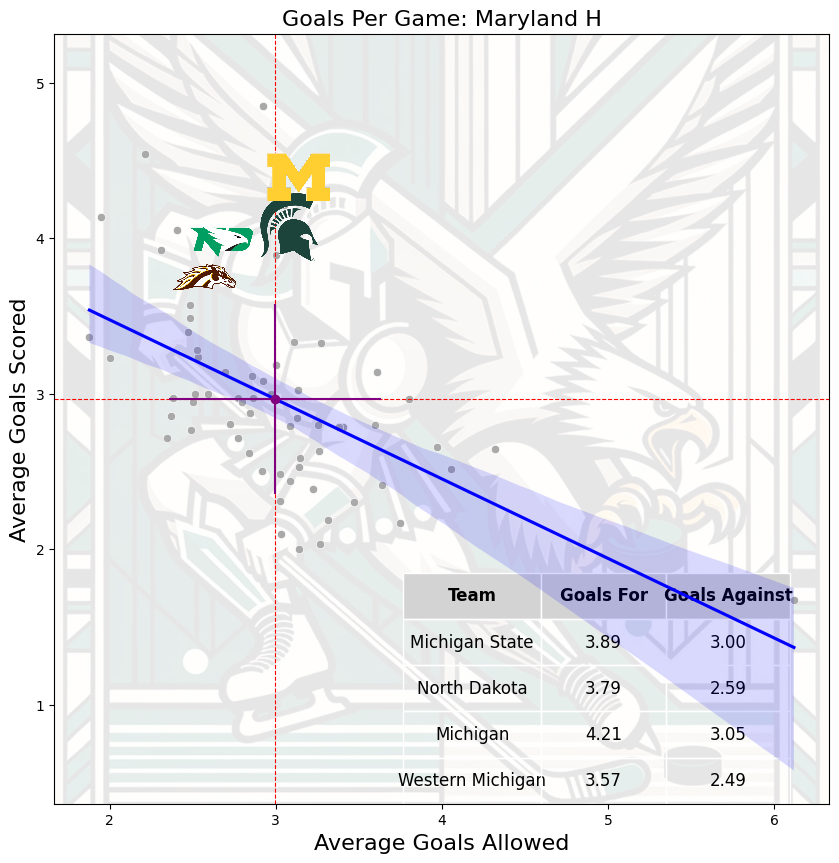

In [12]:

region_name = 'Maryland H'


# #### Set Background Image
path_to_bg_image =  'bc1.png' #
alpha_value = 0.1 # Set the transparency of the background image
## Load the background image
bg_img = mpimg.imread(background_folder + path_to_bg_image)

# Call the function with the specified parameters
create_avg_goals_plot(region_name, conn, logo_mapping, logo_folder, region_dict)

## Penalty Mins Per Game

- Unsure if this is calculating the Minutes correctly, need to recheck
- actually It might be right. I was checking by taking player total penalties and deviding by games played. This probably ingored bench penalties.
    - Too late right now to explore furthur

### Code

In [13]:
def create_avg_penalty_plot(region_name, conn, logo_mapping, logo_folder, region_dict):
    # SQL query to calculate the average penalty minutes "for" and "against" each team
    avg_penalty_for_against_query = """
    WITH UniqueGames AS (
    SELECT DISTINCT Team, Game_ID, PIM FROM linescore
    )
    SELECT
        a.Team,
        AVG(a.PIM) AS Avg_Penalty_Minutes_For,
        AVG(b.PIM) AS Avg_Penalty_Minutes_Against
    FROM UniqueGames AS a
    JOIN UniqueGames AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
    GROUP BY a.Team;
    """

    
    
    
    ### OLD CODE - ERROR PRONE
    # avg_penalty_for_against_query = """
    # WITH UniquePenalties AS (
    #     SELECT DISTINCT * FROM penalty_summary
    # ),
    # PenaltyFor AS (
    #     SELECT
    #         Team,
    #         AVG(Total_Penalty_Minutes) AS Avg_Penalty_Minutes_For
    #     FROM (
    #         SELECT
    #             Team,
    #             Game_ID,
    #             SUM(Pen_Length) AS Total_Penalty_Minutes
    #         FROM UniquePenalties
    #         GROUP BY Team, Game_ID
    #     )
    #     GROUP BY Team
    # ),
    # PenaltyAgainst AS (
    #     SELECT
    #         b.Team,
    #         AVG(a.Total_Penalty_Minutes) AS Avg_Penalty_Minutes_Against
    #     FROM (
    #         SELECT
    #             Team,
    #             Game_ID,
    #             SUM(Pen_Length) AS Total_Penalty_Minutes
    #         FROM UniquePenalties
    #         GROUP BY Team, Game_ID
    #     ) AS a
    #     JOIN UniquePenalties AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
    #     GROUP BY b.Team
    # )
    # SELECT
    #     a.Team,
    #     a.Avg_Penalty_Minutes_For,
    #     b.Avg_Penalty_Minutes_Against
    # FROM PenaltyFor AS a
    # JOIN PenaltyAgainst AS b ON a.Team = b.Team;

    # """

    # Execute the query and store the results in a DataFrame
    avg_penalty_for_against_df = pd.read_sql(avg_penalty_for_against_query, conn)
    # avg_penalty_for_against_df.head()

    # Calculate average and standard deviation for "For" and "Against"
    avg_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].mean()
    std_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].std()
    avg_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].mean()
    std_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].std()

    figure_size = (10,10)
    # Create the scatter plot for all teams
    fig, ax = plt.subplots(figsize=figure_size)
    sns.scatterplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', color='darkgrey', ax=ax)

    # get and store the x and y limits
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    # Add trend line
    sns.regplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', scatter=False, color='blue')

    # Add average lines and standard deviation markers
    plt.axhline(y=avg_for, color='red', linestyle='--', linewidth=0.8)
    plt.axvline(x=avg_against, color='red', linestyle='--', linewidth=0.8)
    plt.errorbar(avg_against, avg_for, xerr=std_against, yerr=std_for, color='purple', fmt='o')

    # Set the background image
    # Ensure that the extent of the background image is also adjusted to the new xmin
    plt.imshow(bg_img, aspect='auto', extent=[xmin, xmax, ymin, ymax], zorder=0, alpha=alpha_value)

    # Overlay logos for specific teams in the region
    teams_in_region = region_dict[region_name]

    add_logos_to_plot(avg_penalty_for_against_df, 'Avg_Penalty_Minutes_Against', 'Avg_Penalty_Minutes_For', logo_mapping, logo_folder, ax, teams_in_region)

    # Create table data
    table_data = [['Team', 'PIM', 'Opp PIM']]
    for team in teams_in_region:
        team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
        if not team_data.empty:
            table_data.append([
                team, 
                f"{team_data['Avg_Penalty_Minutes_For'].values[0]:.1f}",
                f"{team_data['Avg_Penalty_Minutes_Against'].values[0]:.1f}"
            ])

    # Define the column widths, making the first column wider
    col_widths = [0.25, 0.225, 0.225]  # Adjust the values as needed

    # Add a table at the top right of the plot & Set Parameters
    table = plt.table(cellText=table_data, loc='best', 
                      colWidths=col_widths,
                      cellLoc='center', 
                      bbox=[0.45, 0, 0.5, 0.3]
                      )
    
    # Customize the table properties
    table.auto_set_font_size(False)
    table.set_fontsize(12)  # Set the fontsize
    table.scale(1, 1.5)  # Scale the table for width and height

    # Set individual cell properties
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            # Header row
            cell.set_text_props(weight='bold')  # Make the header bold
            cell.set_facecolor('lightgrey')  # Header background color
        else:
            # All other rows
            cell.set_facecolor('none')  # Make cells transparent
            # cell.set_text_props(weight='bold')  # Optionally make text bold
        cell.set_edgecolor('w')  # Set the border color to white

    # Add title and axis labels
    plt.title('Penalty Minutes Per Game: ' + region_name, fontdict=font_title_param)
    plt.xlabel('Opponent Penalty Minutes', fontdict=font_label_param)
    plt.ylabel('Team Penalty Minutes', fontdict=font_label_param)

    plt.show()





### Run & Output

findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.


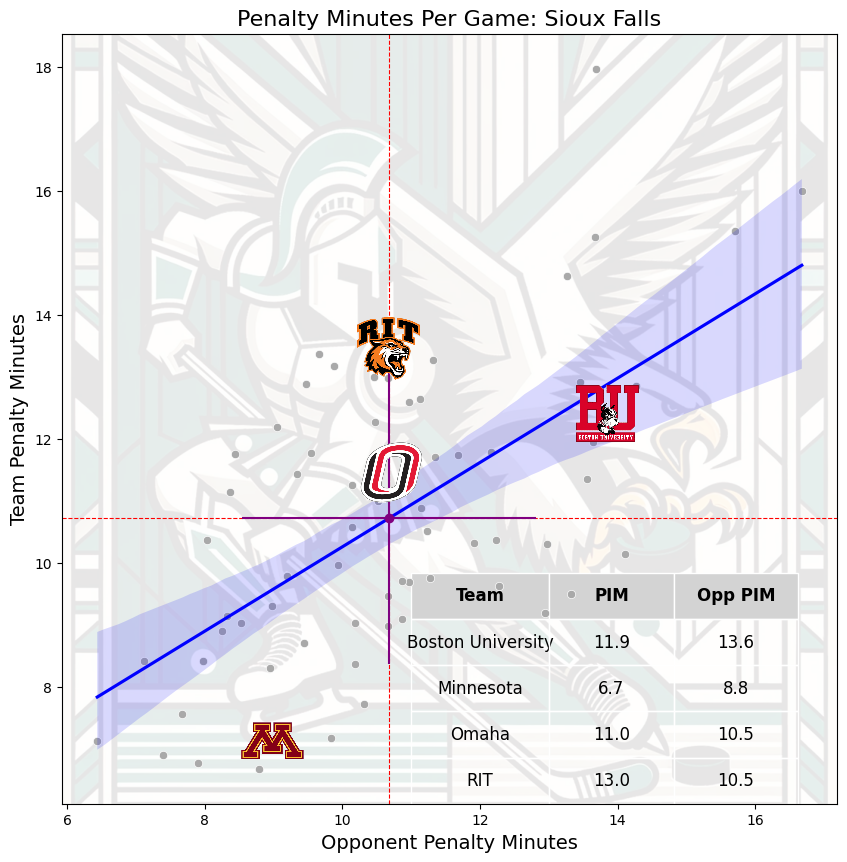

In [14]:

# Set Region Name
region_name = 'Sioux Falls'

# Call the function with the specified parameters
create_avg_penalty_plot(region_name, conn, logo_mapping, logo_folder, region_dict)

## Goals By Time of Game

### Code

In [15]:
#### Refactoring from ORIG code in Adaptable Plotting Book
import matplotlib.ticker as ticker

## Functions
### get the basic info from the scoring summary table
def fetch_goals_time_data(conn):
    goals_time_query = """
    WITH UniqueGoals AS (
        SELECT DISTINCT Team, Period, Time, Game_ID
        FROM scoring_summary
    )
    SELECT Team, Period, Time, Game_ID
    FROM UniqueGoals;
    """
    return pd.read_sql(goals_time_query, conn)


### Convert the time to continuous time [0-65] for plotting
def convert_to_continuous_time(row):
    period = row['Period']
    time = row['Time']
    minutes, seconds = map(int, time.split(':'))
    
    if period == '1st Period':
        offset = 0
    elif period == '2nd Period':
        offset = 20
    elif period == '3rd Period':
        offset = 40
    else:
        offset = 60
        
    return offset + minutes + seconds / 60.0

goals_time_df = fetch_goals_time_data(conn)

goals_time_df['Time'] = goals_time_df.apply(convert_to_continuous_time, axis=1)

# goals_time_df.head()

In [16]:
# Revised function to correctly parse team names, accounting for additional hyphens in team names
def infer_conceded_goals_corrected_v4(df):
    conceded_goals = []
    for index, row in df.iterrows():
        # Split the game ID to find the teams involved
        # Since teams can have hyphens in their names, we take all parts after the date
        game_id_parts = row['Game_ID'].split('-')
        teams_in_game = ['-'.join(game_id_parts[3:4]), '-'.join(game_id_parts[4:])]  # Correctly extract the team names
        # Identify the opposing team
        opposing_team = teams_in_game[1] if row['Team'] == teams_in_game[0] else teams_in_game[0]
        # Add a row for the conceded goal
        conceded_goals.append({'Team': opposing_team, 'Time': row['Time'], 'Game_ID': row['Game_ID']})
    
    # Create a DataFrame for conceded goals
    conceded_goals_df = pd.DataFrame(conceded_goals)
    return conceded_goals_df

# Create the corrected conceded goals dataframe
conceded_goals_df_corrected_v4 = infer_conceded_goals_corrected_v4(goals_time_df)

# Display the first few rows of the corrected conceded goals dataframe
# conceded_goals_df_corrected_v4.head(25)


In [17]:
# # This is a pseudo-code to indicate the debugging steps.

# # Verify that 'Denver' exists in the DataFrame columns you're querying.
# print('Denver' in goals_time_df['Team'].values)  # Replace 'Team' with the actual team column name
# print('Denver' in conceded_goals_df_corrected_v4['Team'].values)  # Same here

# # If 'Denver' exists, check for typing mismatches or case sensitivity
# print(goals_time_df['Team'].unique())  # This will show you all unique entries in the 'Team' column

# # # When filtering the DataFrame, handle the case where 'Denver' might not be present
# # if 'Denver' in goals_time_df['Team'].values:
# #     # Perform your operations here
# # else:
# #     print("Denver is not in the DataFrame.")

# # goals_time_df.sample(10)

# team_goals_time_df = goals_time_df[goals_time_df['Team'] == 'Denver']

# # team_goals_time_df.head()


In [18]:
# team_colors

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np


def plot_goals_by_time(region_name, goals_time_df, conceded_goals_df_corrected_v4, region_dict, TEMP_FOLDER, dpi):
    half_page = (10,10)  # Half Page
    fig, ax = plt.subplots(4, 1, figsize=half_page, dpi=dpi)

    teams_to_plot = region_dict[region_name]

    # Calculate the max y-value and histograms for all teams
    max_y_value = 0
    team_histograms = {}
    for team in teams_to_plot:
        team_goals_time_df = goals_time_df[goals_time_df['Team'] == team]
        bin_counts, _ = np.histogram(team_goals_time_df['Time'], bins=80, range=[0, 80])
        max_y_value = max(max_y_value, max(bin_counts))
        team_histograms[team] = bin_counts


    ## Loop through each team and plot the histogram of goals scored by time
    for i, team in enumerate(teams_to_plot):
        team_goals_time_df = goals_time_df[goals_time_df['Team'] == team]
        
        # Retrieve the team color from the dictionary
        team_color = team_colors_dict.get(team, 'default_color')  # Provide a default color if the team is not found

        # Plot histogram
        sns.histplot(data=team_goals_time_df, x='Time', bins=65, ax=ax[i], color=team_color, zorder=1)
        
        # # Plot KDE with adjusted bandwidth
        sns.kdeplot(data=team_goals_time_df, x='Time', ax=ax[i], color="red", bw_adjust=0.5, zorder=2)

        # Plot the goals conceded by the team as a histogram in the background in grey
        team_conceded_goals_df = conceded_goals_df_corrected_v4[conceded_goals_df_corrected_v4['Team'] == team]
        sns.histplot(data=team_conceded_goals_df, x='Time', bins=80, ax=ax[i], color='grey', zorder=2, linewidth=0.5, edgecolor='grey', alpha=0.5)


        
        # Set the x and y axis limits
        ax[i].set_xlim([0, 80])
        ax[i].set_ylim([0, max_y_value+1])

        # Custom x-axis ticks and labels for the periods
        period_ticks = [10, 30, 50, 62.5]  # Midpoints of 1st, 2nd, 3rd periods and OT
        period_labels = ['1st Period', '2nd Period', '3rd Period', 'OT']
        ax[i].set_xticks(period_ticks)
        ax[i].set_xticklabels(period_labels)

        # Add Major grid lines at 20, 40, 60 minute marks to deliniate periods
        
        

        
        # Set the x axis font properties
        ax[i].tick_params(axis='x', which='major', labelsize=8)

        # Remove x label
        ax[i].set_xlabel('')
        # remove tick marks from x axis
        ax[i].tick_params(axis='x', which='major', length=0)
        # Set y label
        ax[i].set_ylabel(f'{team}', fontsize=12)
        # remove tick marks from y axis
        ax[i].tick_params(axis='y', which='major', length=0)
        # remove y tick labels
        # ax[i].set_yticklabels([])
        

        # Set grid, background color, and border properties
        ax[i].grid(True, axis='y', color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.9, zorder=0)
        ax[i].grid(True, axis='x', color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.9, zorder=0)
        # shade the periods - first and third periods (0 to 20 and 40 to 60) in light grey
        ax[i].axvspan(0, 20, facecolor='lightgrey', alpha=0.5, zorder=0)
        ax[i].axvspan(40, 60, facecolor='lightgrey', alpha=0.5, zorder=0)
        # Shade 2nd period and OT in light yeallow
        ax[i].axvspan(20, 40, facecolor='lightyellow', alpha=0.75, zorder=0)
        ax[i].axvspan(60, 65, facecolor='lightyellow', alpha=0.75, zorder=0)

        # Remove The x labels from all but the last plot
        # if i != 3:
        #     ax[i].set_xlabel('')
        #     ax[i].set_xticklabels([])

        # Add the x ticks and labels but only to the fisrt plot and above the plot
        if i == 0:
            ax[i].tick_params(axis='x', which='major', pad=10, top=True, labeltop=True)
            # Remove tick marks from bottom of plot
            ax[i].tick_params(axis='x', which='major', bottom=False, labelbottom=False)
            # ax[i].set_xlabel('Game Time', font_label_param)

        else:        
            # Remove tick labels from all but plot 1
            ax[i].set_xticklabels([])

    # Adjust the spacing between plots
    fig.tight_layout()
    # # Add a midpoint tick to the y axis
    # ax[0].yaxis.set_major_locator(ticker.MultipleLocator(1))
    # ax[1].yaxis.set_major_locator(ticker.MultipleLocator(1))
    # ax[2].yaxis.set_major_locator(ticker.MultipleLocator(1))
    # ax[3].yaxis.set_major_locator(ticker.MultipleLocator(1))

    # add the tick labels to the right side of the plot
    ax[0].tick_params(axis='y', labelleft=False, labelright=True)
    ax[1].tick_params(axis='y', labelleft=False, labelright=True)
    ax[2].tick_params(axis='y', labelleft=False, labelright=True)
    ax[3].tick_params(axis='y', labelleft=False, labelright=True)


    # Label just 3 ticks on the y axis, the minium, the midpoint and the maximum
    ax[0].set_yticks([0, 5])
    ax[1].set_yticks([0, 5])
    ax[2].set_yticks([0, 5])
    ax[3].set_yticks([0, 5])

    # Add Minor grid lines
    ax[0].minorticks_on()  # Enable minor ticks
    ax[0].grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.6, which='minor', axis='y')
    ax[1].minorticks_on()  # Enable minor ticks
    ax[1].grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.6, which='minor', axis='y')
    ax[2].minorticks_on()  # Enable minor ticks
    ax[2].grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.6, which='minor', axis='y')
    ax[3].minorticks_on()  # Enable minor ticks
    ax[3].grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.6, which='minor', axis='y')

    # Change all gird lines to underneath plot elements
    for i in range(4):
        ax[i].set_axisbelow(True)

    fig.tight_layout()

    # Set title for entire figure
    # fig.suptitle('Goals Over Time', **font_title_param)

    # Add Text box with note 'Team Color - Goals Scored, Grey - Goals Conceded'
    fig.text(0.5, 0.01, 'Team Color: Goals Scored | Grey: Goals Conceded | Each Bar is Equal to 1 Minute Increment', ha='center', va='center', fontsize=14, color='black')


    # Save the plot
    # plt.savefig(f'{TEMP_FOLDER}goals_scored_by_time.png', bbox_inches='tight', dpi=dpi, transparent=True)

    # Show the plot
    plt.show()


### Output

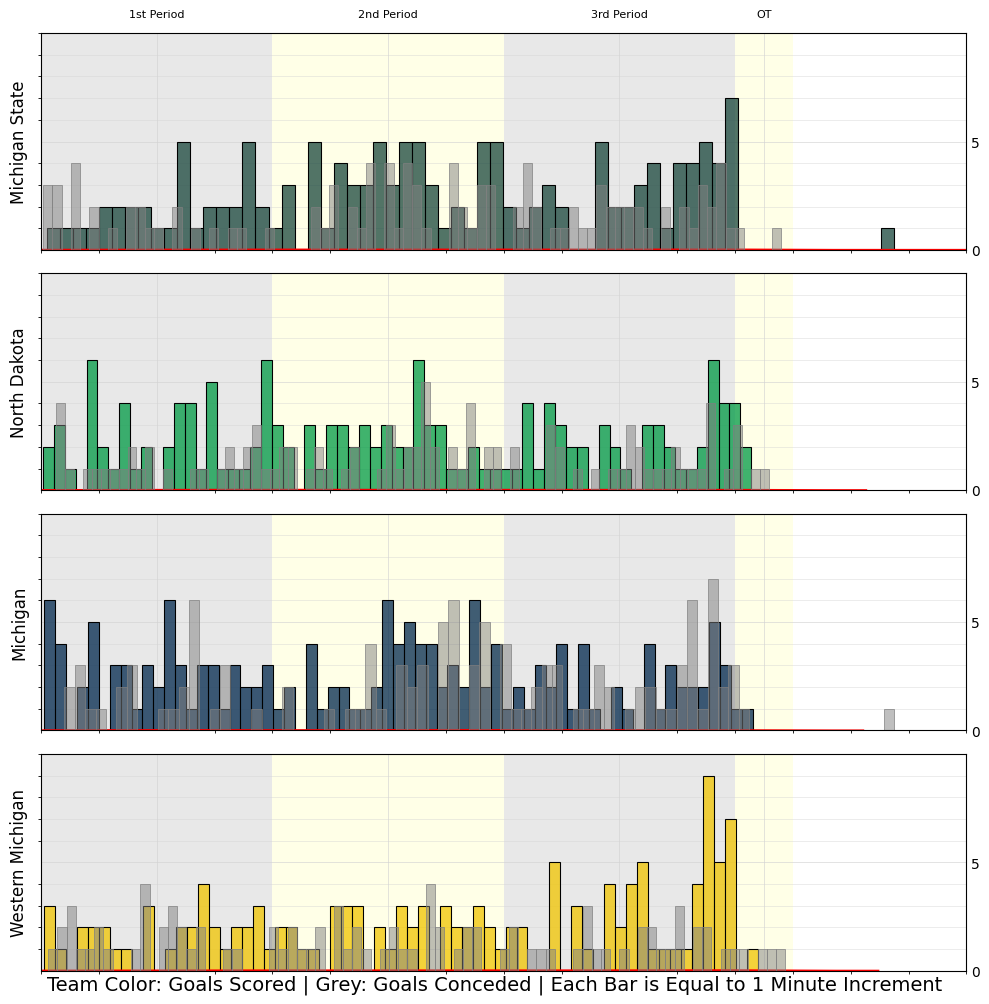

In [20]:

# Convert the 'Team' and 'Hex1' columns of team_colors_df into a dictionary
team_colors_dict = pd.Series(team_colors.Hex1.values, index=team_colors.Team).to_dict()

# Example usage
region_name = 'Maryland H'

plot_goals_by_time(region_name, goals_time_df, conceded_goals_df_corrected_v4, region_dict, TEMP_FOLDER, dpi=100)


## Penalties over Time

### Code

In [21]:
# select the penalty summary table
penalty_summary_query = """
WITH UniquePenalties AS (
    SELECT DISTINCT * FROM penalty_summary
)
SELECT * FROM UniquePenalties;
"""

# Read the penalty summary table into a dataframe
penalty_summary_df = pd.read_sql(penalty_summary_query, conn)

# output to csv in temp folder
penalty_summary_df.to_csv(f'{TEMP_FOLDER}penalty_summary.csv', index=False)


# Penalt Length to int
penalty_summary_df['Pen_Length'] = penalty_summary_df['Pen_Length'].astype('int')



### Convert the time to continuous time [0-65] for plotting
def convert_to_continuous_time(row):
    period = row['Period']
    time = row['Time']
    minutes, seconds = map(int, time.split(':'))
    
    if period == '1st Period':
        offset = 0
    elif period == '2nd Period':
        offset = 20
    elif period == '3rd Period':
        offset = 40
    else:
        offset = 60
        
    return offset + minutes + seconds / 60.0



def plot_team_penalties(team, penalty_data, color_mapping=None, ax=None, smoothing_window=5, bins=65):
    # Convert times to continuous format
    penalty_data['Start_Time'] = penalty_data.apply(convert_to_continuous_time, axis=1)
    penalty_data['End_Time'] = penalty_data['Start_Time'] + penalty_data['Pen_Length']

    # Filter out 10-minute penalties
    penalty_data = penalty_data[penalty_data['Pen_Length'].isin([2, 5])]

    # Identify Game IDs involving the specified team
    team_game_ids = penalty_data[penalty_data['Team'] == team]['Game_ID'].unique()

    # Filter penalties to those in the team's games
    team_games_penalty_data = penalty_data[penalty_data['Game_ID'].isin(team_game_ids)]

    # Initialize time series
    time_points = np.linspace(0, 65, 65 * 60)  # 1-second intervals
    team_penalty_count = np.zeros_like(time_points)
    opponent_penalty_count = np.zeros_like(time_points)

    # Calculate penalty count for team and opponents
    for _, row in team_games_penalty_data.iterrows():
        start_idx = np.searchsorted(time_points, row['Start_Time'])
        end_idx = np.searchsorted(time_points, row['End_Time'])
        if row['Team'] == team:
            team_penalty_count[start_idx:end_idx] += 1
        else:
            opponent_penalty_count[start_idx:end_idx] += 1

    
    

    # Use the color mapping dictionary
    color = color_mapping.get(team, 'default_color')  # Replace 'default_color' with a default color hex

    # Plot the data on the provided ax subplot
    ax.hist(time_points, bins=65, range=[0, 65], weights=team_penalty_count, 
            color=color, alpha=0.9, label=f'{team} Penalties', linewidth=0.5, edgecolor='black')
    ax.hist(time_points, bins=65, range=[0, 65], weights=opponent_penalty_count, color='grey', 
            alpha=0.5, label='Opponent Penalties', linewidth=0.75, edgecolor='black')

    # Customize the subplot as needed
    ax.set_xlabel('')
    ax.set_ylabel(f'{team}', fontsize=14)
    ax.tick_params(axis='y', which='major', length=0)
    ax.tick_params(axis='y', which='major', labelsize=0)
    ax.set_title(f'Penalty Box Occupancy Over Time for {team}')
    ax.set_title('') # REMOVE TITLE IF NOT NEEDED
    ax.grid(True)
    
    # Custom x-axis ticks and labels for the periods
    period_ticks = [10, 30, 50, 62.5]  # Midpoints of 1st, 2nd, 3rd periods and OT
    period_labels = ['1st Period', '2nd Period', '3rd Period', 'OT']
    ax.set_xticks(period_ticks)
    ax.set_xticklabels(period_labels)

    
    # Set grid, background color, and border properties
    ax.grid(True, axis='y', color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.9, zorder=0)
    ax.grid(True, axis='x', color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.9, zorder=0)
    # shade the periods - first and third periods (0 to 20 and 40 to 60) in light grey
    ax.axvspan(0, 20, facecolor='lightgrey', alpha=0.5, zorder=0)
    ax.axvspan(40, 60, facecolor='lightgrey', alpha=0.5, zorder=0)
    # Shade 2nd period and OT in light yeallow
    ax.axvspan(20, 40, facecolor='lightyellow', alpha=0.75, zorder=0)
    ax.axvspan(60, 65, facecolor='lightyellow', alpha=0.75, zorder=0)
    ax.set_axisbelow(True)

    # Remove The x labels from all but the last plot
    # if i != 3:
    #     ax[i].set_xlabel('')
    #     ax[i].set_xticklabels([])

def plot_region_penalties(region_name, region_dict, penalty_data, color_mapping, figure_size=(10, 10)):
    teams_to_plot = region_dict.get(region_name, [])
    
    # Determine the maximum y-value across all histograms for the teams in the region
    max_y_value = 0
    for team in teams_to_plot:
        team_penalties = penalty_summary_df[penalty_summary_df['Team'] == team]
        counts, _ = np.histogram(team_penalties['Pen_Length'], bins=65, range=[0, 65])
        max_y_value = max(max_y_value, counts.max())

    # Create a figure with subplots for each team
    fig, axes = plt.subplots(len(teams_to_plot), 1, figsize=figure_size, sharex=True)

    # If there's only one team to plot, axes will not be an array, so we make it one for consistency
    if len(teams_to_plot) == 1:
        axes = [axes]

    # Ensure that the time_points and bins are consistent and aligned across all histograms
    time_points = np.linspace(0, 65, 65 * 60)  # 1-second intervals
    bins = np.linspace(0, 65, 66)  # 65 bins from 0 to 65

    # Plot the penalties for each team using consistent bins and time_points
    for i, team in enumerate(teams_to_plot):
        plot_team_penalties(team, penalty_data, color_mapping, ax=axes[i], bins=bins)
        axes[i].set_ylim([0, max_y_value + 600])  # Use max_y_value + 1 to ensure the highest bin is fully visible

    # Set Title for the entire figure
    fig.suptitle(f'Penalty Box Occupancy Over Time: \n{region_name} Region', **font_title_param)

    # set the x-axis label but just for the last plot
    axes[-1].set_xlabel('Team Color: Players In Box | Grey: Opponent In Box | Each Bar is Equal to 1 Minute Increment', **font_label_param)

    # Adjust the layout and save/show the plot as needed
    plt.tight_layout()
    plt.show()


### Output

findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.


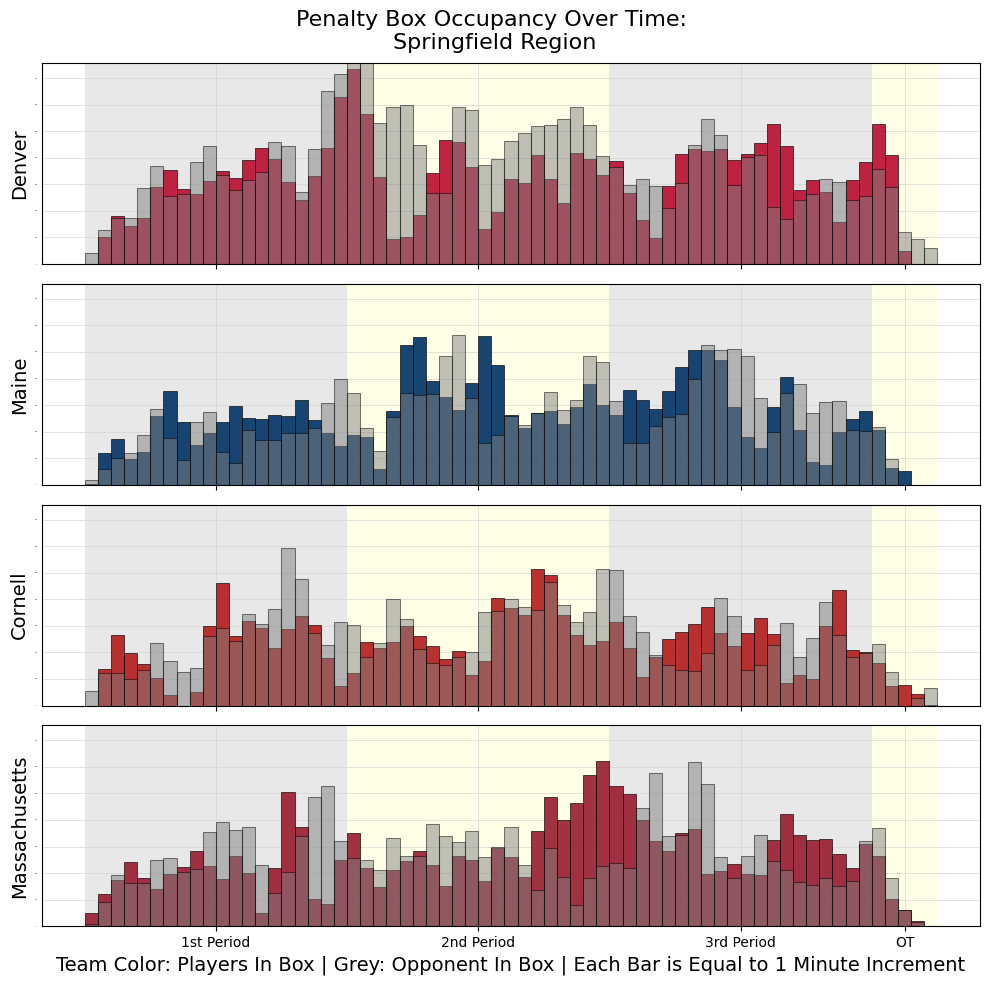

In [22]:
## Example Usage
region_name = 'Springfield'

# Call the function with the specified parameters
plot_region_penalties(region_name, region_dict, penalty_summary_df, team_colors_dict, figure_size=(10, 10))

## Line By Line Stats

### The Dirty Work

In [23]:
away_games_df = pd.read_sql("""
WITH UniqueGames AS (
    SELECT DISTINCT * FROM game_details
)
SELECT 
    Away_Team AS Team, 
    COUNT(DISTINCT Game_ID) AS Num_Games_Away
FROM UniqueGames
GROUP BY Away_Team;
""", conn)

home_games_df = pd.read_sql("""
WITH UniqueGames AS (
    SELECT DISTINCT * FROM game_details
)
SELECT 
    Home_Team AS Team, 
    COUNT(DISTINCT Game_ID) AS Num_Games_Home
FROM UniqueGames
GROUP BY Home_Team;
""", conn)



games_played_count = pd.merge(away_games_df, home_games_df, how='outer', on='Team')
games_played_count['Num_Games'] = games_played_count['Num_Games_Away'].fillna(0) + games_played_count['Num_Games_Home'].fillna(0)
games_played_count = games_played_count[['Team', 'Num_Games']]

# games_played_count.tail()

In [24]:
# Query to get line-specific stats for goals, assists, and penalty minutes scored for each team,
# now also including the Position column to distinguish between Forwards and Defensemen
line_goals_assists_pim_position_query = """
WITH UniqueLineChart AS (
    SELECT DISTINCT Team, Game_ID, Line, Player, Position
    FROM line_chart
    WHERE Position != 'Goalie'
),
UniquePlayerStats AS (
    SELECT DISTINCT Game_ID, Team, Player, G, A, Sh, plus_minus, PIM
    FROM player_stats
)
SELECT
    ulc.Team,
    ulc.Line,
    ulc.Position,
    SUM(ups.G) AS Total_Goals,
    SUM(ups.A) AS Total_Assists,
    SUM(ups.Sh) AS Total_Shots,
    SUM(ups.G) + SUM(ups.A) AS Total_Points,
    SUM(ups.plus_minus) AS Total_Plus_Minus,
    SUM(ups.PIM) AS Total_PIM
FROM UniqueLineChart AS ulc
LEFT JOIN UniquePlayerStats AS ups ON ulc.Game_ID = ups.Game_ID AND ulc.Team = ups.Team AND ulc.Player = ups.Player
GROUP BY ulc.Team, ulc.Line, ulc.Position
ORDER BY ulc.Team, ulc.Line, ulc.Position;

"""

# Execute the query and store the results in a DataFrame
line_goals_assists_pim_position_df = pd.read_sql(line_goals_assists_pim_position_query, conn)

# Create a new column 'Type' to distinguish between Forwards and Defensemen
line_goals_assists_pim_position_df['Type'] = line_goals_assists_pim_position_df['Position'].apply(lambda x: 'Forward' if x in ['Left Wing', 'Right Wing', 'Center'] else 'Defense')

# Step 1: Create 'Type' column
# (You've already done this part)
line_goals_assists_pim_position_df['Type'] = line_goals_assists_pim_position_df['Position'].apply(
    lambda x: 'Forward' if x in ['Left Wing', 'Right Wing', 'Center'] else 'Defense'
)

# Step 2: Aggregate again by 'Type'
agg_columns = ['Total_Goals', 'Total_Assists', 'Total_PIM', 'Total_Points', 'Total_Shots', 'Total_Plus_Minus']
grouped_df = line_goals_assists_pim_position_df.groupby(['Team', 'Line', 'Type'])[agg_columns].sum().reset_index()

# Now, you can merge the 'Num_Games' and calculate the averages as before
grouped_df = pd.merge(grouped_df, games_played_count, how='left', on='Team')

# Calculate the average stats per game
grouped_df['AVG_Goals'] = grouped_df['Total_Goals'] / grouped_df['Num_Games']
grouped_df['AVG_Assists'] = grouped_df['Total_Assists'] / grouped_df['Num_Games']
grouped_df['AVG_Points'] = grouped_df['Total_Points'] / grouped_df['Num_Games']
grouped_df['AVG_PIM'] = grouped_df['Total_PIM'] / grouped_df['Num_Games']
grouped_df['AVG_Shots'] = grouped_df['Total_Shots'] / grouped_df['Num_Games']
grouped_df['AVG_Plus_Minus'] = grouped_df['Total_Plus_Minus'] / grouped_df['Num_Games']


# Rename grouped_df to line_goals_assists_pim_position_df
line_goals_assists_pim_position_df = grouped_df

In [25]:
line_goals_assists_pim_position_df.tail()

,Team,Line,Type,Total_Goals,Total_Assists,Total_PIM,Total_Points,Total_Shots,Total_Plus_Minus,Num_Games,AVG_Goals,AVG_Assists,AVG_Points,AVG_PIM,AVG_Shots,AVG_Plus_Minus
484,Yale,2,Forward,21.0,18.0,72.0,39.0,171.0,-33.0,30.0,0.700000,0.600000,1.300000,2.400000,5.700000,-1.100000
485,Yale,3,Defense,4.0,11.0,20.0,15.0,77.0,-13.0,30.0,0.133333,0.366667,0.500000,0.666667,2.566667,-0.433333
486,Yale,3,Forward,6.0,11.0,30.0,17.0,93.0,-26.0,30.0,0.200000,0.366667,0.566667,1.000000,3.100000,-0.866667
487,Yale,4,Defense,0.0,0.0,0.0,0.0,1.0,0.0,30.0,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000
488,Yale,4,Forward,5.0,10.0,56.0,15.0,88.0,-3.0,30.0,0.166667,0.333333,0.500000,1.866667,2.933333,-0.100000


In [29]:
data = line_goals_assists_pim_position_df

# Filter data to just teams in the tourney
# pairwise_df Teams to a list
tourny_list = pairwise_df['Team'].to_list()
tourney_team_data = data[data['Team'].isin(tourny_list)]

def plot_data(data, stat, ax, team_colors, team_order, set_linewidth):
    # Plot the background bars for all teams in the dataset
    sns.barplot(x='Line', y=stat, hue='Team', data=tourney_team_data, 
                color='lightgrey', alpha=0.6, ax=ax, ci=None)

    # Plot the foreground bars for the specified teams
    filtered_data = data[data['Team'].isin(team_order)]
    sns.barplot(x='Line', y=stat, hue='Team', data=filtered_data, 
                palette=team_colors, ax=ax, ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth, hue_order=team_order)
    
    # Remove the legend
    ax.get_legend().remove()

def add_background_shading(ax, x_breaks, colors):
    for i, color in enumerate(colors):
        ax.axvspan(x_breaks[i][0], x_breaks[i][1], facecolor=color, alpha=0.5, zorder=0)

def plot_region_stats(region_name, region_dict, data, team_colors, set_linewidth, all_color, figure_size=(10, 10), dpi=100):
    # Define the figure size and create subplots
    fig, axs = plt.subplots(4, 2, figsize=figure_size, dpi=dpi)

    # Filter the data for teams in the region
    teams_to_plot = region_dict.get(region_name, [])
    filtered_data = data[data['Team'].isin(teams_to_plot)]

    # Define stats
    stats = ['AVG_Goals', 'AVG_Shots', 'AVG_PIM', 'AVG_Plus_Minus']

    forwards_data = filtered_data[filtered_data['Type'] == 'Forward']
    defense_data = filtered_data[filtered_data['Type'] == 'Defense']
    defense_data = defense_data[defense_data['Line'] != '4']


    # Plotting logic
    for i, stat in enumerate(stats):
        # plot_region_stats(region_name, region_dict, line_goals_assists_pim_position_df, team_colors_dict, set_linewidth=0.5, all_color='lightgrey', figure_size=(10, 10), dpi=100)
        defense_data = defense_data[defense_data['Line'] != '4']

        plot_data(forwards_data, stat, axs[i, 0], team_colors, teams_to_plot, set_linewidth)
        plot_data(defense_data, stat, axs[i, 1], team_colors, teams_to_plot, set_linewidth)

        # Background shading
        forward_x_breaks = [(0.5, 1.5), (1.5, 2.5), (2.5, 3.5), (3.5, 4.5)]
        defense_x_breaks = [(0.5, 1.5), (1.5, 2.5), (2.5, 3.5)]
        colors = ['lightgrey', 'lightyellow']
        add_background_shading(axs[i, 0], forward_x_breaks, colors)
        add_background_shading(axs[i, 1], defense_x_breaks, colors)


    


    # Show the plot
    plt.show()


In [27]:
line_goals_assists_pim_position_df.head()

,Team,Line,Type,Total_Goals,Total_Assists,Total_PIM,Total_Points,Total_Shots,Total_Plus_Minus,Num_Games,AVG_Goals,AVG_Assists,AVG_Points,AVG_PIM,AVG_Shots,AVG_Plus_Minus
0,Air Force,1,Defense,14.0,52.0,103.0,66.0,243.0,-29.0,38.0,0.368421,1.368421,1.736842,2.710526,6.394737,-0.763158
1,Air Force,1,Forward,34.0,45.0,55.0,79.0,238.0,-36.0,38.0,0.894737,1.184211,2.078947,1.447368,6.263158,-0.947368
2,Air Force,2,Defense,4.0,13.0,48.0,17.0,81.0,2.0,38.0,0.105263,0.342105,0.447368,1.263158,2.131579,0.052632
3,Air Force,2,Forward,20.0,20.0,64.0,40.0,211.0,-10.0,38.0,0.526316,0.526316,1.052632,1.684211,5.552632,-0.263158
4,Air Force,3,Defense,6.0,13.0,39.0,19.0,83.0,0.0,38.0,0.157895,0.342105,0.500000,1.026316,2.184211,0.000000


### Output

C:\Users\jbanc\AppData\Local\Temp\ipykernel_15500\3004647752.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y=stat, hue='Team', data=tourney_team_data,
C:\Users\jbanc\AppData\Local\Temp\ipykernel_15500\3004647752.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightgrey'` for the same effect.

  sns.barplot(x='Line', y=stat, hue='Team', data=tourney_team_data,
C:\Users\jbanc\AppData\Local\Temp\ipykernel_15500\3004647752.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y=stat, hue='Team', data=filtered_data,
C:\Users\jbanc\AppData\Local\Temp\ipykernel_15500\3004647752.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y=stat, hue='Team', data=tourney_team_data,
C:\Users\jbanc\AppData\Lo

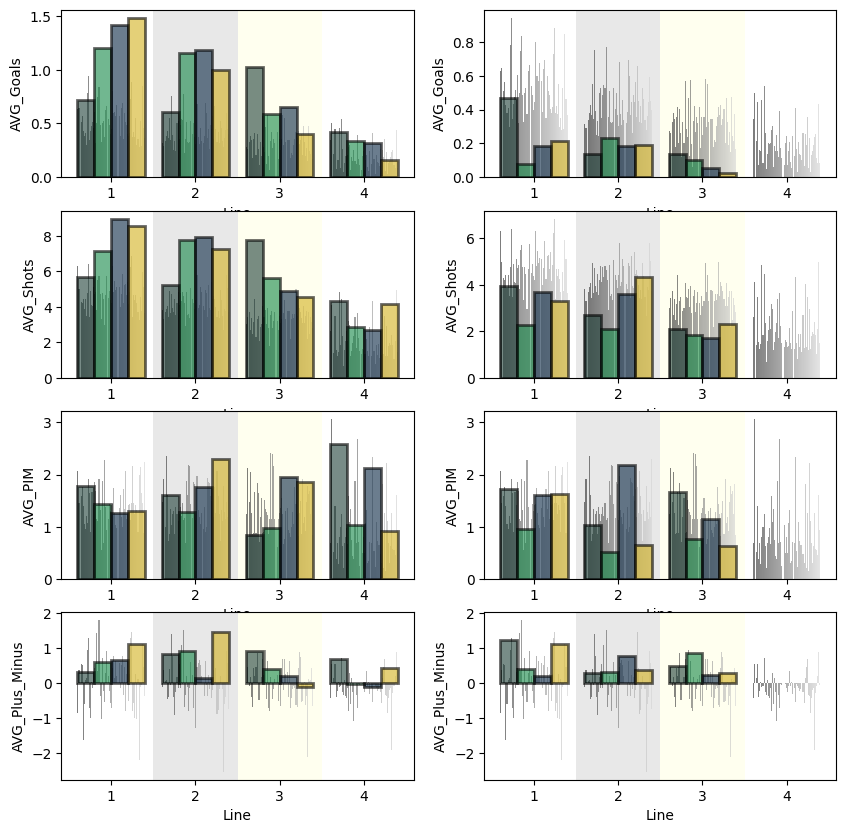

In [30]:
# Corrected function call
plot_region_stats(
    region_name='Maryland H',
    region_dict=region_dict,
    data=line_goals_assists_pim_position_df,
    team_colors=team_colors_dict,
    set_linewidth=2,
    all_color='#CCCCCC',  # default color for background data
    figure_size=(10, 10),
    dpi=100
)